In [3]:
# Import Packages

import numpy as np
import pandas as pd
import networkx as nx
import os
import matplotlib.pyplot as plt
import itertools

### Creating a bipartite network for every decade

In [11]:
networks = {}

for decade in range(1950,2023, 10):
    # load data
    print('starting', decade)
    print('loading data...')
    url = f"https://raw.githubusercontent.com/leon-marx/billnius/main/songs_cleaned_decade/songs_{decade}.csv"
    data = pd.read_csv(url, sep=';')
    print('data loaded')
    
    # Get words, songs and edges
    print('creating word, song and edge lists...')
    words = []
    songs = []
    edges = []

    for songid in range(len(data['lyrics'])):
        title = data.iloc[songid, 2]
        title = title[:-4]
        songs.append(title)
        lyrics = data.iloc[songid, 3]
        for word in lyrics.split(" "):
            words.append(word)
            tupple = (title, word)
            edges.append(tupple)
        
    words, w_counts = np.unique(words, return_counts=True)
    words = [x for _, x in sorted(zip(w_counts, words))][::-1]
    w_counts = sorted(w_counts)[::-1]
    
    
    # Create Network
    
    print('creating network...')
    
    G = nx.Graph()

    # add songs as nodes
    G.add_nodes_from(songs, bipartite=0)

    # add words as nodes
    G.add_nodes_from([
            (word, {"size": w_counts[i]}) for i, word in enumerate(words)
        ], bipartite=1)

    # add edges as nodes
    G.add_edges_from(edges)
    print(decade, 'done')
       
    networks[f"{decade}"] = G
    

starting 1950
loading data...
data loaded
creating word, song and edge lists...
creating network...
1950 done
starting 1960
loading data...
data loaded
creating word, song and edge lists...
creating network...
1960 done
starting 1970
loading data...
data loaded
creating word, song and edge lists...
creating network...
1970 done
starting 1980
loading data...
data loaded
creating word, song and edge lists...
creating network...
1980 done
starting 1990
loading data...
data loaded
creating word, song and edge lists...
creating network...
1990 done
starting 2000
loading data...
data loaded
creating word, song and edge lists...
creating network...
2000 done
starting 2010
loading data...
data loaded
creating word, song and edge lists...
creating network...
2010 done
starting 2020
loading data...
data loaded
creating word, song and edge lists...
creating network...
2020 done


In [30]:
# Export Bipartite Network
nx.write_gexf(G, f'{decade}_bipartite.gexf')

In [39]:
decades = []

for decade in range(1950,2023,10):
    decades.append(f"{decade}")

### Exploratory Analysis

In [41]:
# Average Centrality
for network, G in networks.items():
    dc=nx.degree_centrality(G)
    avg = sum(dc.values()) / float(len(dc))
    print(network+": ", avg)

1950:  0.0001498166425663537
1960:  0.0001519273667295626
1970:  0.00015019440554221483
1980:  0.00021762585406975783
1990:  0.00021319961413176412
2000:  0.0005508678665460446
2010:  0.00042403425097794063
2020:  0.0005830298726034297


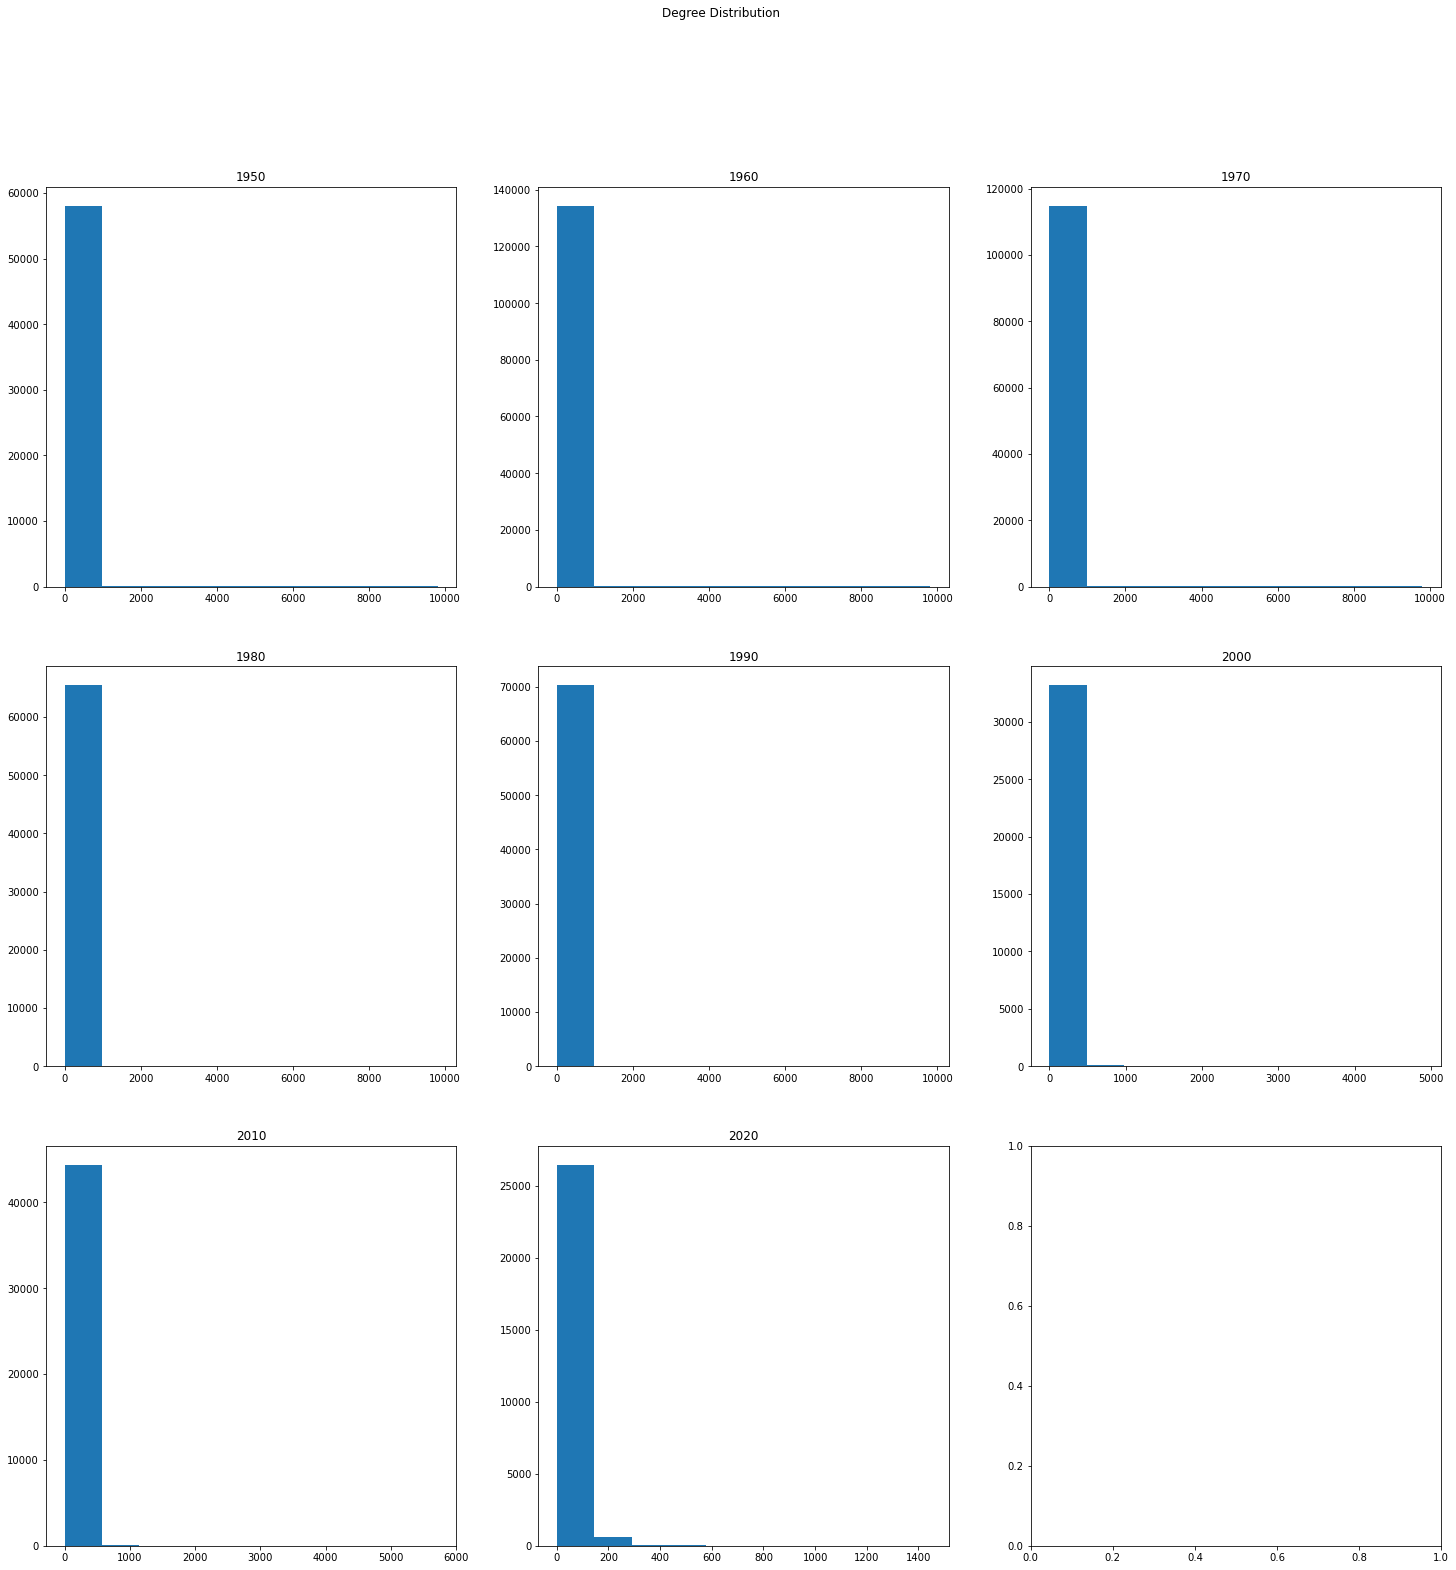

In [50]:
# degree distribution

fig, axs = plt.subplots(3,3,figsize=(25,25))
fig.suptitle('Degree Distribution')
for i in range(3):
    for j in range(3):
        if i*3+j+1>len(networks): # pass the others that we can't fill
            continue
        index = decades[i*3+j]
        degrees = [networks[index].degree(n) for n in networks[index].nodes()]
        axs[i, j].hist(degrees)
        axs[i, j].set_title(index)
plt.show()

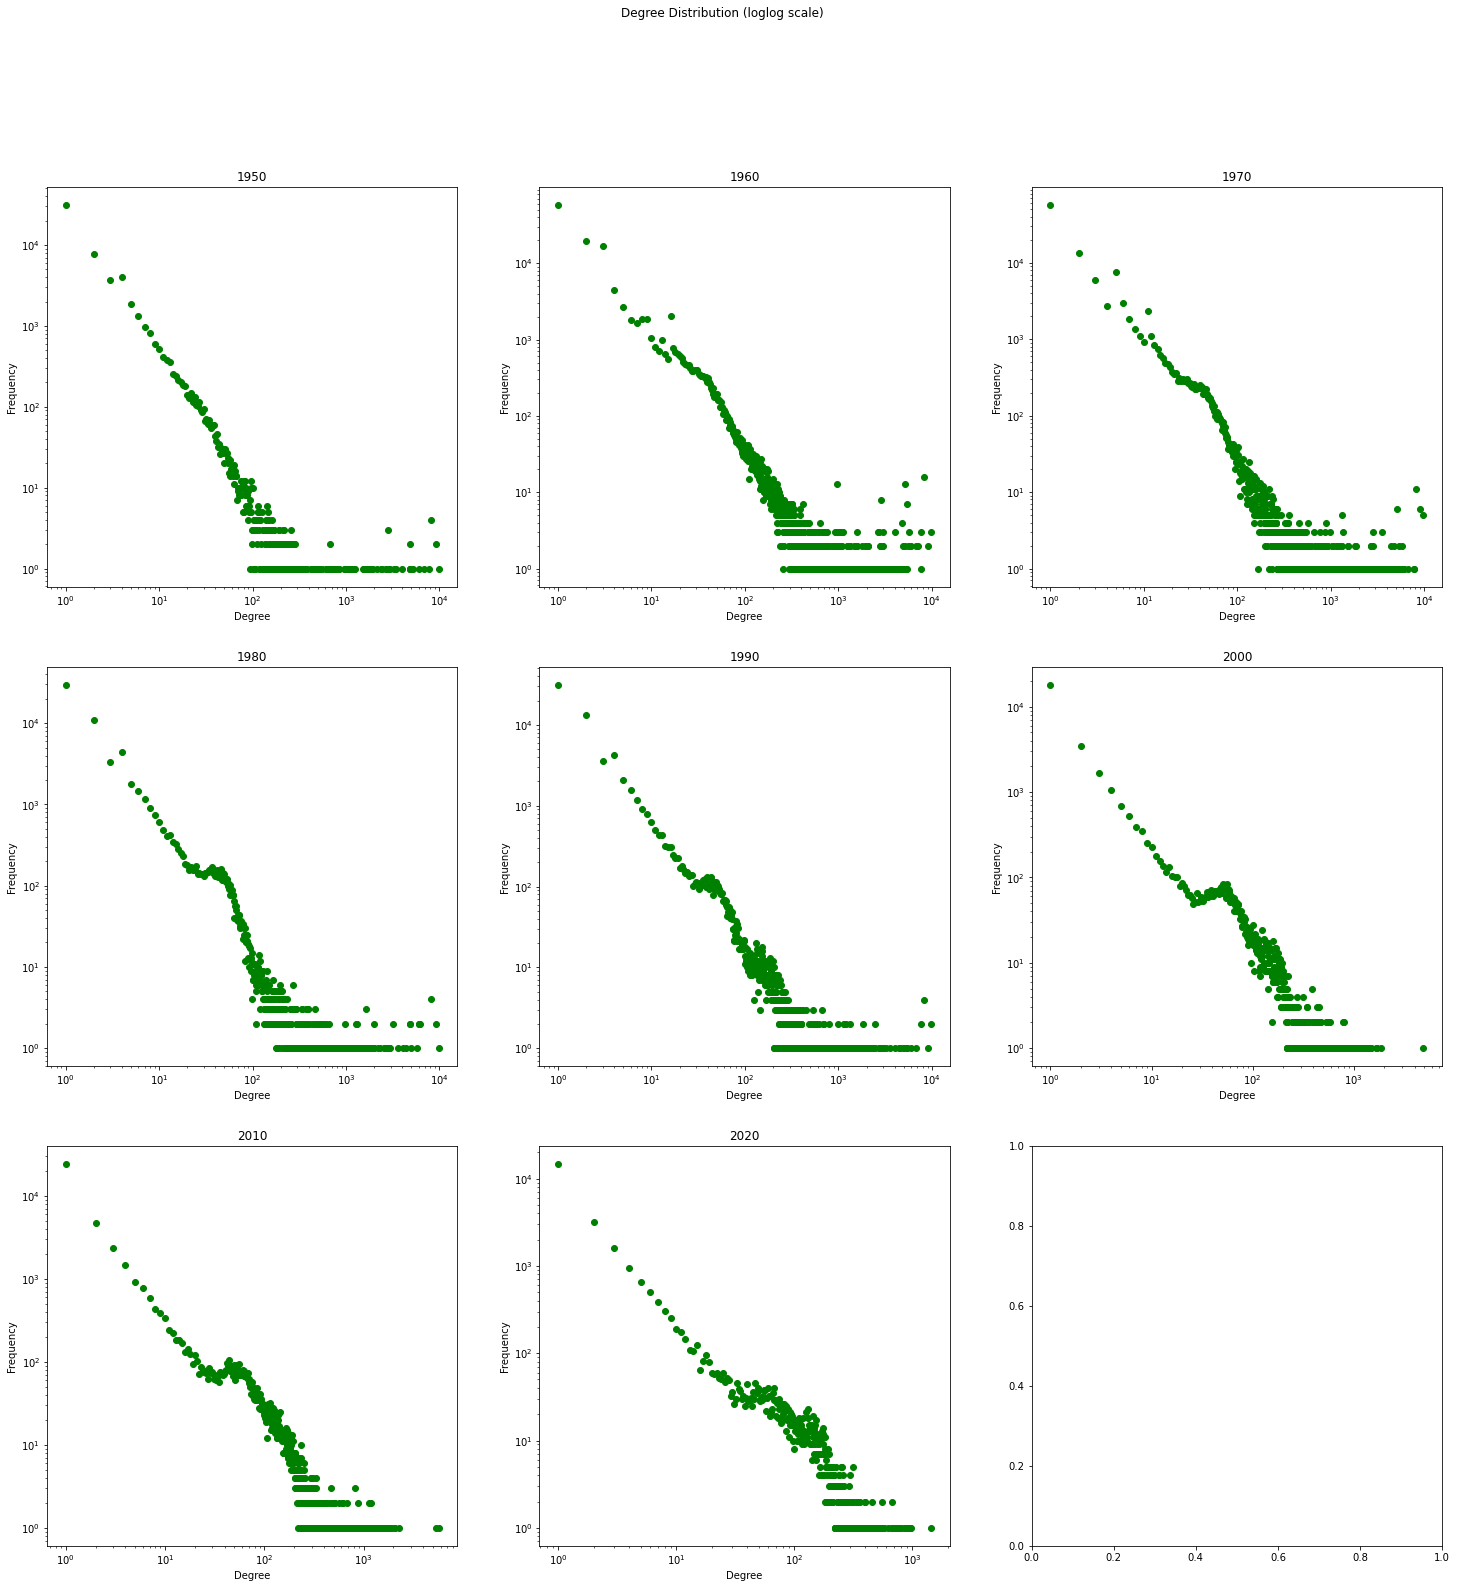

In [53]:
# degree distribution (loglog)

fig, axs = plt.subplots(3,3,figsize=(25,25))
fig.suptitle('Degree Distribution (loglog scale)')
for i in range(3):
    for j in range(3):
        if i*3+j+1>len(networks): # pass the others that we can't fill
            continue
        index = decades[i*3+j]
        G = networks[index]
        
        degree_freq = nx.degree_histogram(G)
        degrees = range(len(degree_freq))
        
        axs[i, j].loglog(degrees, degree_freq,'go')
        axs[i, j].set_xlabel('Degree')
        axs[i, j].set_ylabel('Frequency')
        axs[i, j].set_title(index)
plt.show()

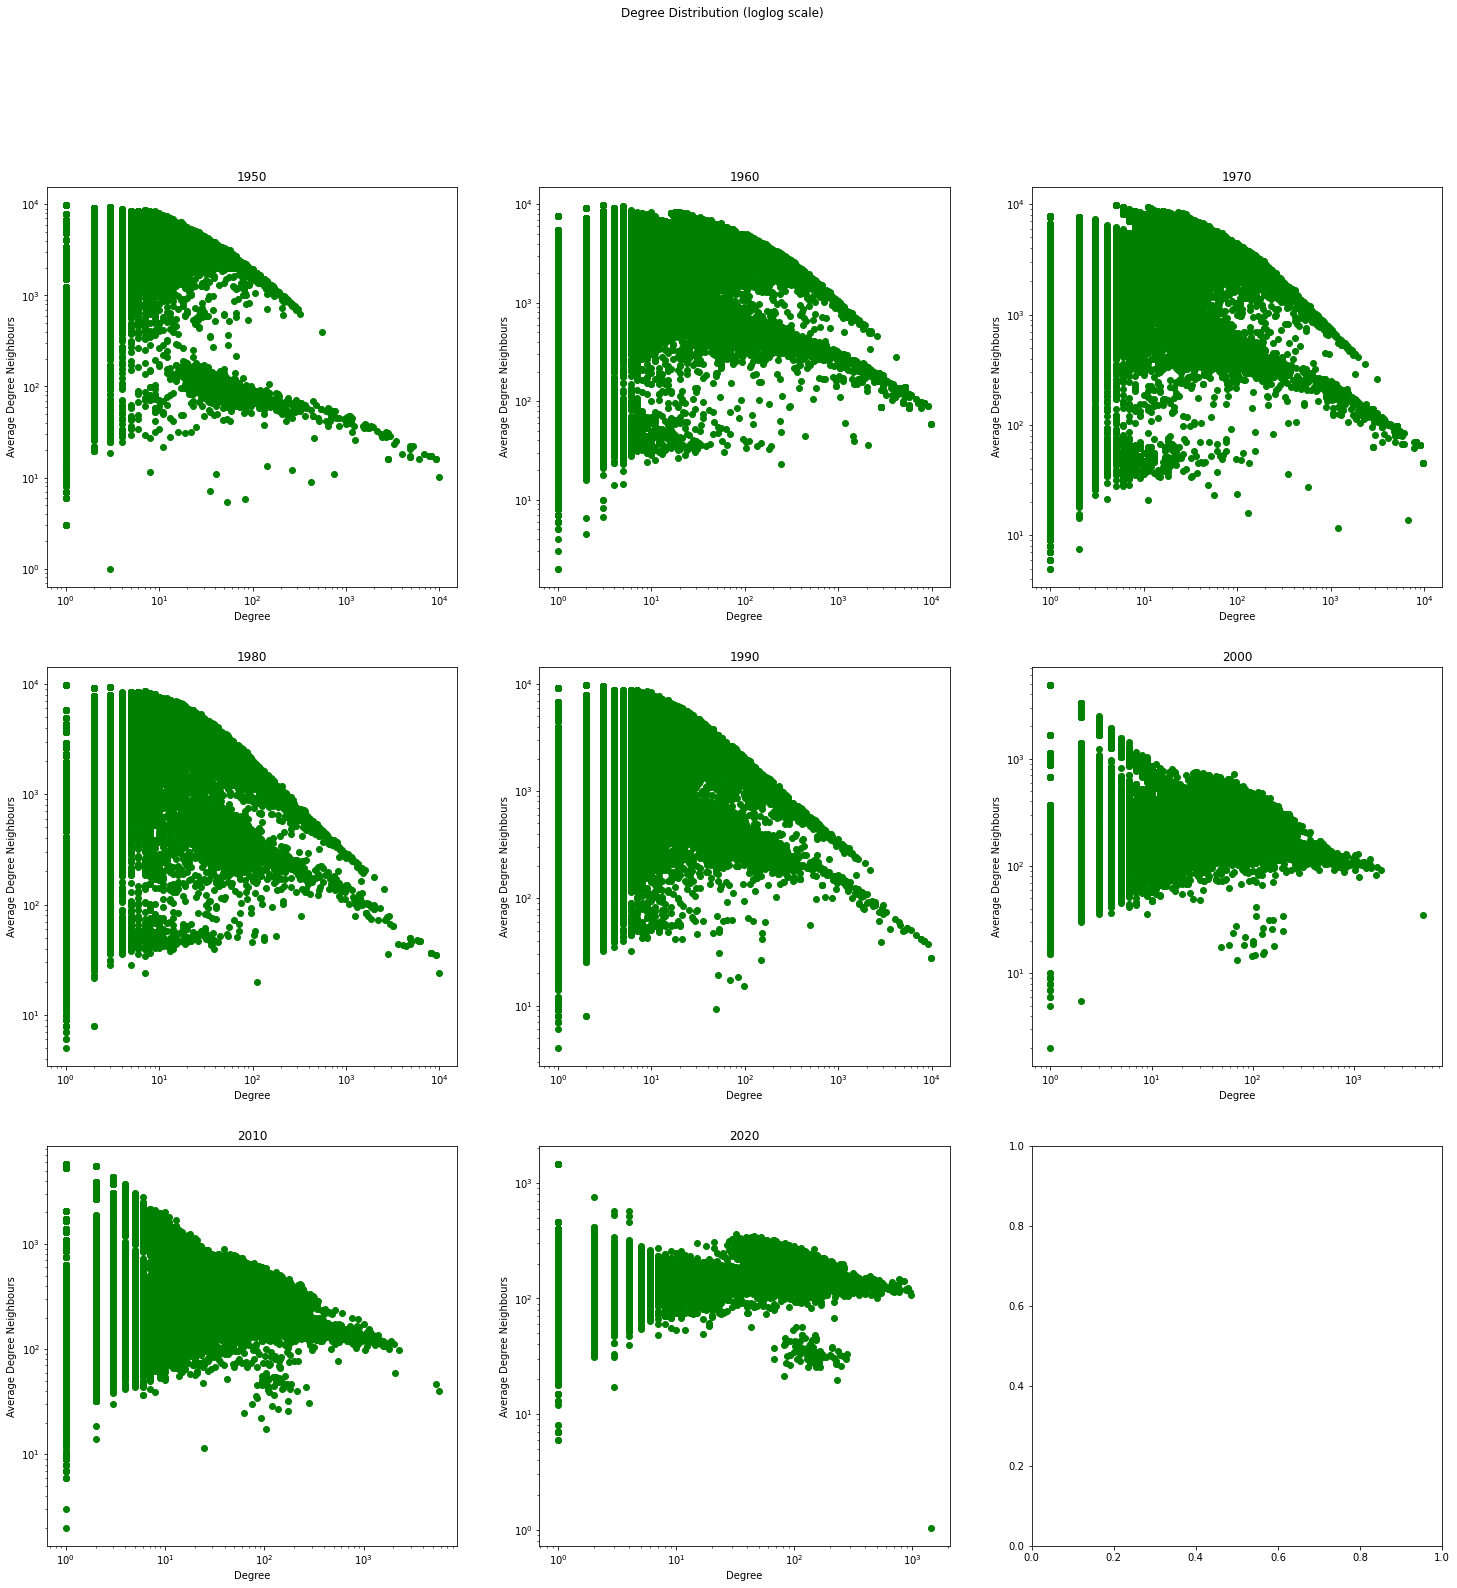

In [54]:
# Assortativity

fig, axs = plt.subplots(3,3,figsize=(25,25))
fig.suptitle('Degree Distribution (loglog scale)')
for i in range(3):
    for j in range(3):
        if i*3+j+1>len(networks): # pass the others that we can't fill
            continue
        index = decades[i*3+j]
        G = networks[index]
        
        degrees = [val for (node, val) in G.degree()]
        neighbours = list(nx.average_neighbor_degree(G).values())
        
        axs[i, j].loglog(degrees, neighbours, 'go')
        axs[i, j].set_xlabel('Degree')
        axs[i, j].set_ylabel('Average Degree Neighbours')
        axs[i, j].set_title(index)
plt.show()

In [ ]:
# Clustering Coefficient

for network, G in networks.items():
    clust_coef = nx.average_clustering(G)
    print(network+": ", clust_coef)

1950:  0.0


### Community Detection

In [48]:
from networkx.algorithms import bipartite

songs = {n for n, d in G.nodes(data=True) if d["bipartite"] == 0}
words = set(G) - songs

G_words = bipartite.projected_graph(G, words)

KeyboardInterrupt: 

In [45]:
from networkx.algorithms.community import louvain_communities, greedy_modularity_communities

In [ ]:
communitites = louvain_communities(G_words)